### 부스팅

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()


In [ ]:
import numpy as np
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
wine_nor = MinMaxScaler().fit_transform(wine.data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_nor, wine.target, stratify=wine.target, test_size=0.2, 
    random_state=2022
)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(radom_state=2022)
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'radom_state': 2022,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9722222222222222

In [ ]:
from xgboost import plot_importance as xgb_plot_importance
import matplotlib.pyplot as plt

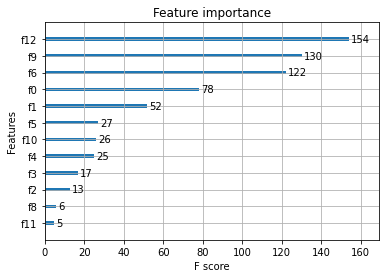

In [ ]:
xgb_plot_importance(xgb)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth' : [3, 4, 5, 6]
}
grid_xgb = GridSearchCV(
    xgb, params, scoring='accuracy', cv=5
)
grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_

{'max_depth': 4}

In [ ]:
grid_xgb.best_estimator_.score(X_test, y_test)

0.9722222222222222

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
# 리스트 안에 튜플 형태로 삽입!
evals = [(X_test, y_test)]
lgb.fit(X_train, y_train, eval_set=evals, eval_metric='logloss', verbose=True)

[1]	valid_0's multi_logloss: 0.990435	valid_0's multi_logloss: 0.990435
[2]	valid_0's multi_logloss: 0.908143	valid_0's multi_logloss: 0.908143
[3]	valid_0's multi_logloss: 0.837356	valid_0's multi_logloss: 0.837356
[4]	valid_0's multi_logloss: 0.764444	valid_0's multi_logloss: 0.764444
[5]	valid_0's multi_logloss: 0.704935	valid_0's multi_logloss: 0.704935
[6]	valid_0's multi_logloss: 0.64864	valid_0's multi_logloss: 0.64864
[7]	valid_0's multi_logloss: 0.600436	valid_0's multi_logloss: 0.600436
[8]	valid_0's multi_logloss: 0.552786	valid_0's multi_logloss: 0.552786
[9]	valid_0's multi_logloss: 0.517989	valid_0's multi_logloss: 0.517989
[10]	valid_0's multi_logloss: 0.480141	valid_0's multi_logloss: 0.480141
[11]	valid_0's multi_logloss: 0.451184	valid_0's multi_logloss: 0.451184
[12]	valid_0's multi_logloss: 0.418687	valid_0's multi_logloss: 0.418687
[13]	valid_0's multi_logloss: 0.391787	valid_0's multi_logloss: 0.391787
[14]	valid_0's multi_logloss: 0.367788	valid_0's multi_logloss

LGBMClassifier()

In [ ]:
pred_lgb = lgb.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_lgb)

0.9444444444444444

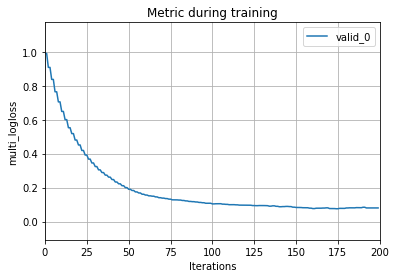

In [ ]:
from lightgbm import plot_metric, plot_importance, plot_tree
plot_metric(lgb);

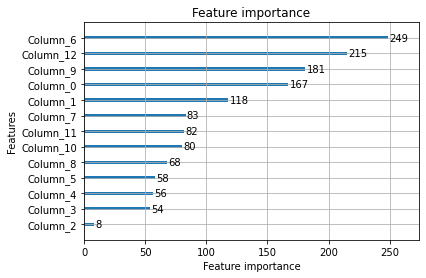

In [ ]:
plot_importance(lgb);

### 회귀모델


In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, 
    random_state=2022
)

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [ ]:
lrc.coef_

array([[-0.25707259, -0.47053468, -0.26515518, -0.3535659 , -0.11973861,
         0.56573207, -0.85426573, -0.82789531,  0.13441632,  0.07846871,
        -1.26329143,  0.29832367, -0.76599244, -0.99137113, -0.30182972,
         1.05456564,  0.08762138, -0.39327008,  0.51932729,  0.5181576 ,
        -0.99890038, -1.13382048, -0.85983726, -0.97362808, -0.6192331 ,
         0.25215457, -0.82557496, -1.11106798, -0.96614897, -0.44679764]])

In [ ]:
lrc.intercept_

array([0.07150263])

In [ ]:
X_test[0]

array([ 1.61396982,  0.66562299,  1.56650313,  1.72099748,  0.1387526 ,
       -0.03109908,  0.74200738,  1.18809286, -0.83832462, -1.25424076,
        1.27415199, -0.36260285,  1.48456748,  1.58550746, -0.1823337 ,
       -0.36597246,  0.06685396,  0.55376156, -0.84540629, -0.68005955,
        2.28842973,  0.8472399 ,  2.36912947,  2.66748641,  0.82549147,
        0.38635918,  1.27139899,  1.89104864, -0.21476962, -0.43201158])

In [ ]:
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_

In [ ]:
val

array([-20.3489795])

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
wind_std =StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wind_std, wine.target, stratify=wine.target, test_size=0.2,
    random_state=2022
)
lrc2 = LogisticRegression(random_state=2022)
lrc2.fit(X_train, y_train)
lrc2.predict_proba(X_test[:5])

array([[4.79532022e-03, 3.83358577e-02, 9.56868822e-01],
       [9.99880390e-01, 8.55323123e-05, 3.40776815e-05],
       [9.99381277e-01, 3.51523074e-04, 2.67199670e-04],
       [9.90776514e-01, 8.80287077e-03, 4.20615400e-04],
       [6.64072526e-04, 9.97939259e-01, 1.39666854e-03]])

In [ ]:
lrc2.predict(X_test[:5])

array([2, 0, 0, 0, 1])

In [ ]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [ ]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

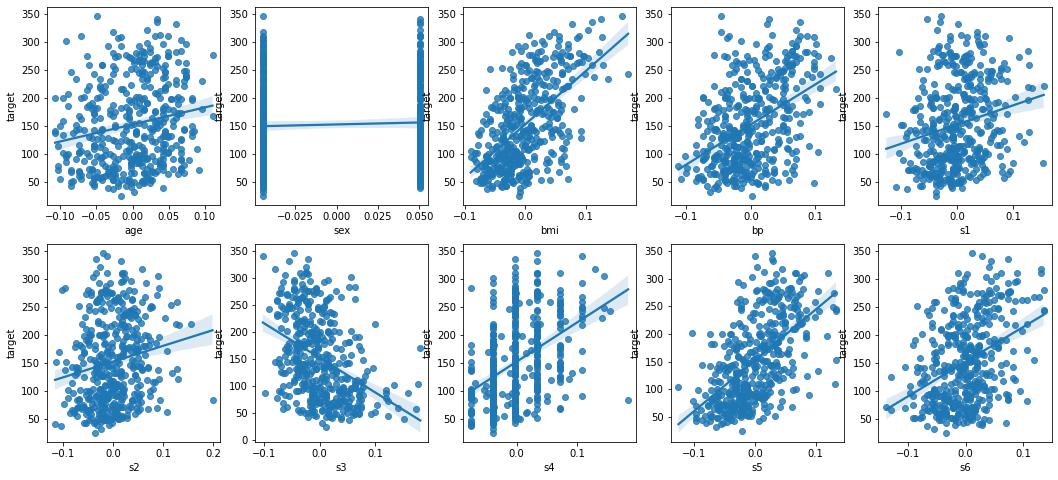

In [ ]:
# 추세선 넣을 때 regplot
import seaborn as sns
_, axs = plt.subplots(2, 5, figsize=(18, 8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i // 5, i % 5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, diabetes.target)
    score = lr.score(X, diabetes.target)
    print(f'{feature}: {score:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1), diabetes.target, test_size=0.1, random_state=2022
)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_ , lr.intercept_, lr._residues



(array([939.55896022]), 151.79247763803028, 1578990.0125372214)

In [ ]:
lr.score(X_test, y_test)

0.46955604545525564

In [ ]:
from sklearn.metrics import r2_score
pred = lr.predict(X_test)
r2_score(y_test, pred)

0.46955604545525564

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mse, rmse

(3127.5719491232653, 55.92469891848561)

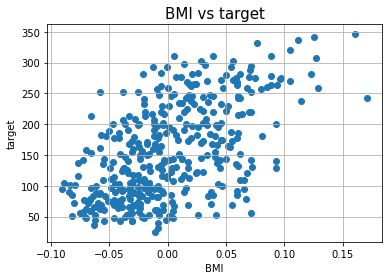

In [ ]:
plt.scatter(X_train, y_train)
plt.grid()
plt.xlabel("BMI")
plt.ylabel("target")
plt.title('BMI vs target', fontsize=15)
plt.show()

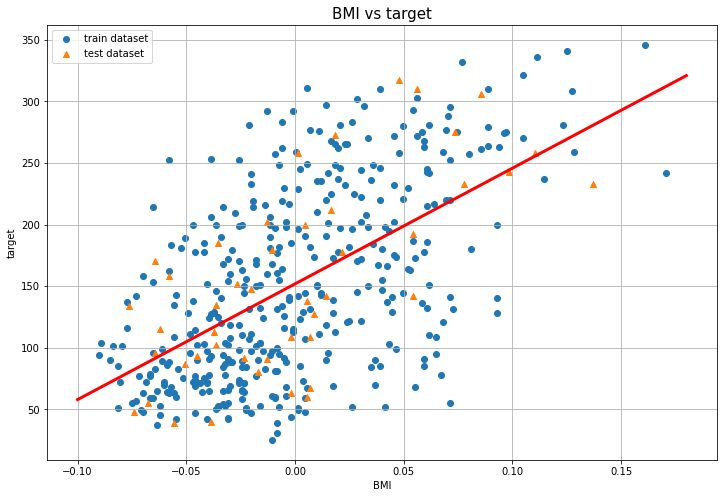

In [ ]:
xs = np.array([-0.1, 0.18])
ys = xs * lr.coef_[0] + lr.intercept_
ys

plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, label='train dataset')
plt.scatter(X_test, y_test, marker='^', label='test dataset')
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.legend()
plt.xlabel("BMI")
plt.ylabel("target")
plt.title('BMI vs target', fontsize=15)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
df = pd.DataFrame( boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


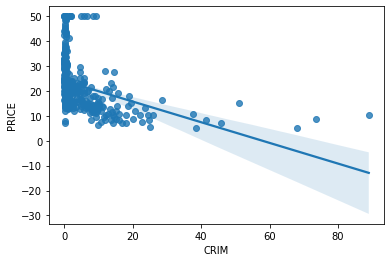

In [ ]:
sns.regplot(x='CRIM', y='PRICE', data=df);

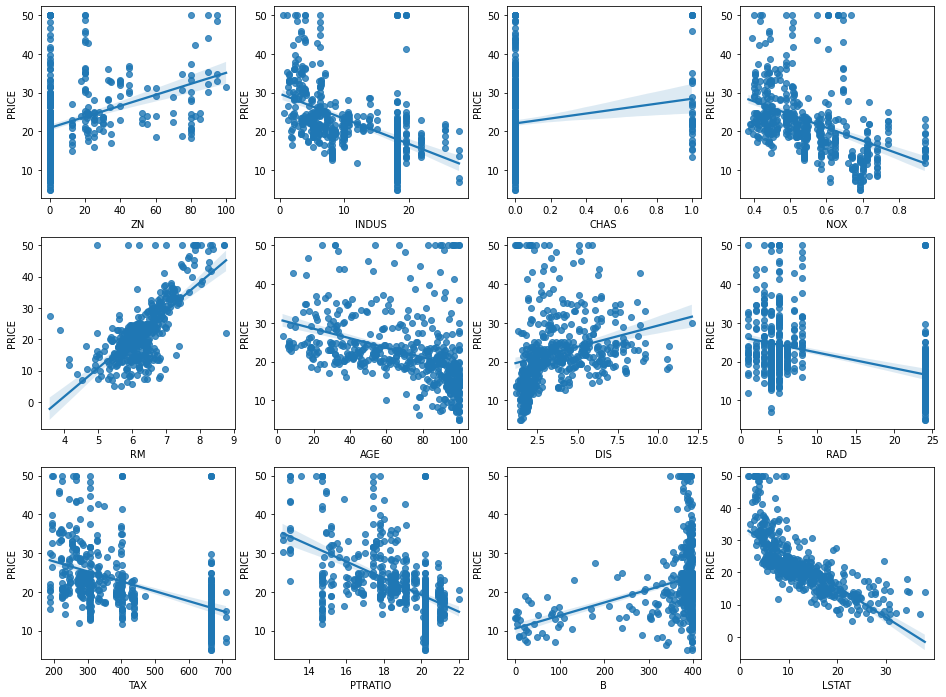

In [ ]:
_, axs = plt.subplots(3, 4, figsize=(16,12))

for i, feature in enumerate(df.columns[1:-1]):
    row, col = i // 4, i % 4
    sns.regplot(x=feature, y='PRICE', data=df, ax = axs[row][col])


In [ ]:
from sklearn.linear_model import LinearRegression

for feature in df.columns[:-1]:
    lr = LinearRegression()
    X = df[feature].values.reshape(-1,1)
    lr.fit(X, boston.target)
    score = lr.score(X, boston.target)
    print(f'{feature}:\t{score:.4f}')

CRIM:	0.1508
ZN:	0.1299
INDUS:	0.2340
CHAS:	0.0307
NOX:	0.1826
RM:	0.4835
AGE:	0.1421
DIS:	0.0625
RAD:	0.1456
TAX:	0.2195
PTRATIO:	0.2578
B:	0.1112
LSTAT:	0.5441


 - 다중 선형회귀

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.1, random_state=2022
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_test, y_test)

0.6739859403280901

In [ ]:
lr.coef_

array([-1.17731004e-01,  4.71909774e-02,  4.93242956e-02,  2.63851612e+00,
       -1.51441273e+01,  4.23531935e+00, -5.23740656e-03, -1.41099144e+00,
        2.91963685e-01, -1.19236187e-02, -8.95445411e-01,  9.80364965e-03,
       -5.27338430e-01])

In [ ]:
lr.intercept_

30.950814924201126

In [ ]:
X_test[0], y_test[0]

(array([1.3960e-01, 0.0000e+00, 8.5600e+00, 0.0000e+00, 5.2000e-01,
        6.1670e+00, 9.0000e+01, 2.4210e+00, 5.0000e+00, 3.8400e+02,
        2.0900e+01, 3.9269e+02, 1.2330e+01]), 20.1)

In [ ]:
np.dot(lr.coef_, X_test[0]) + lr.intercept_

21.227539118774818

In [ ]:
lr.predict(X_test[0].reshape(1, -1))

array([21.22753912])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
pred_lr = lr.predict(X_test)
re_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=2022)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [ ]:
pred_dtr = dtr.predict(X_test)
re_dtr = r2_score(y_test, pred_dtr)
mse_dtr = mean_squared_error(y_test, pred_dtr)

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [ ]:
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

In [ ]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2022)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

In [ ]:

from xgboost import XGBRegressor
xgr = XGBRegressor(random_state=2022)
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

[08:20:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

print('LR\tDT\tSVM\tRF\tXG')
print(f'{re_lr:.4f}\t{re_dtr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xg:.4f}')
print(f'{mse_lr:.4f}\t{mse_dtr:.4f}\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}')

LR	DT	SVM	RF	XG
0.6740	0.8359	0.2758	0.8174	0.8067
27.3672	13.7735	60.7889	15.3267	16.2298


In [ ]:
df = pd.DataFrame({
    'y_test':y_test, 'LR':pred_lr, 'DT':pred_dtr, 'SVM':pred_sv, 'RF':pred_rf, 'XG':pred_xg
})
df.head()

,y_test,LR,DT,SVM,RF,XG
0,20.1,21.227539,19.3,20.644693,19.934,20.255072
1,11.9,7.063817,13.8,16.130347,12.616,17.174437
2,20.6,21.474262,20.6,17.155498,21.612,20.817535
3,33.2,35.783213,33.2,24.229946,35.803,33.393593
4,20.8,18.236587,21.9,15.514814,20.495,19.065611


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

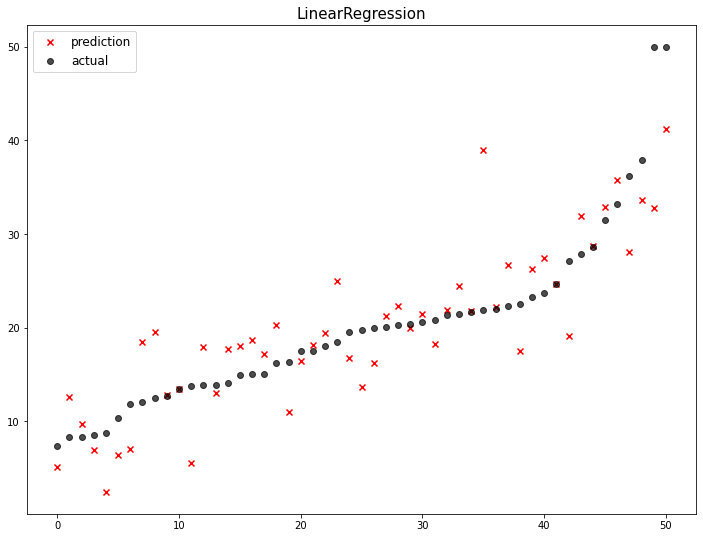

              model        mse
0  LinearRegression  27.367194


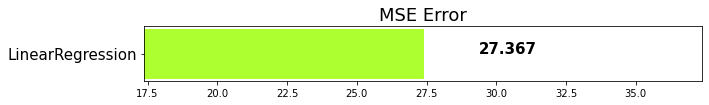

In [ ]:
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)
pred = linear_reg.predict(X_test)
mse_eval('LinearRegression', pred, y_test)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

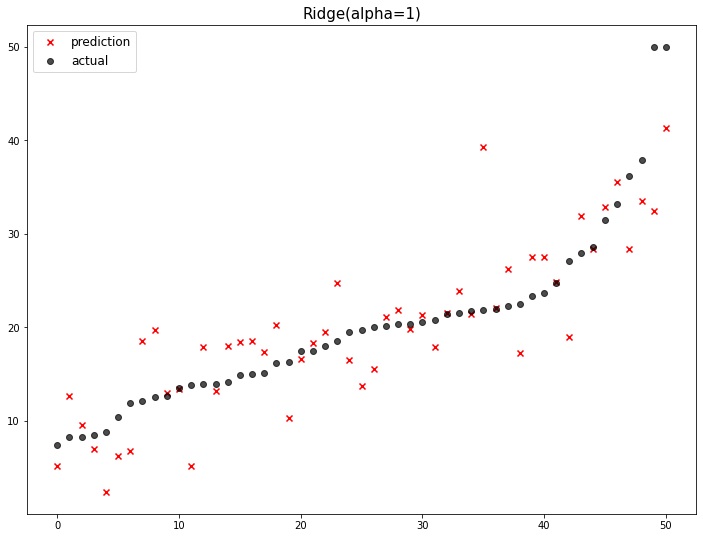

              model        mse
0    Ridge(alpha=1)  28.476510
1  LinearRegression  27.367194


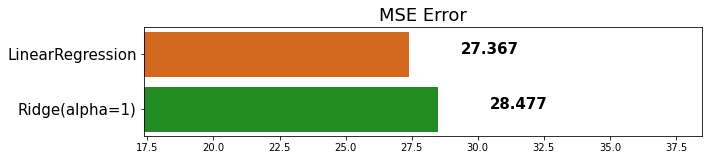

In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

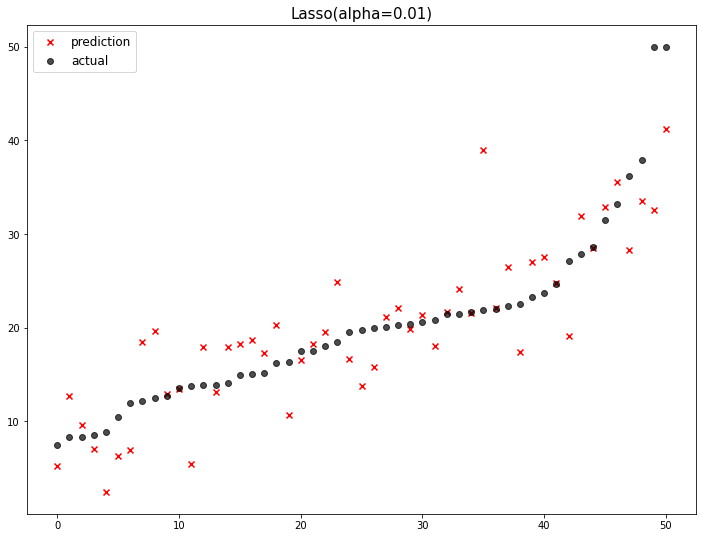

               model        mse
0     Ridge(alpha=1)  28.476510
1  Lasso(alpha=0.01)  27.889024
2   LinearRegression  27.367194


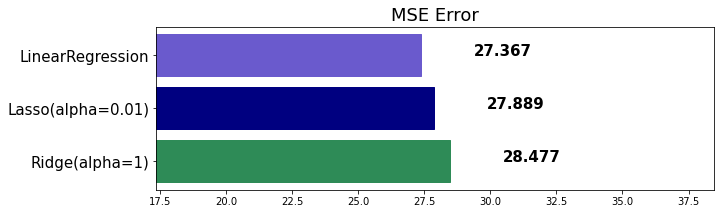

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
pred = lasso.predict(X_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

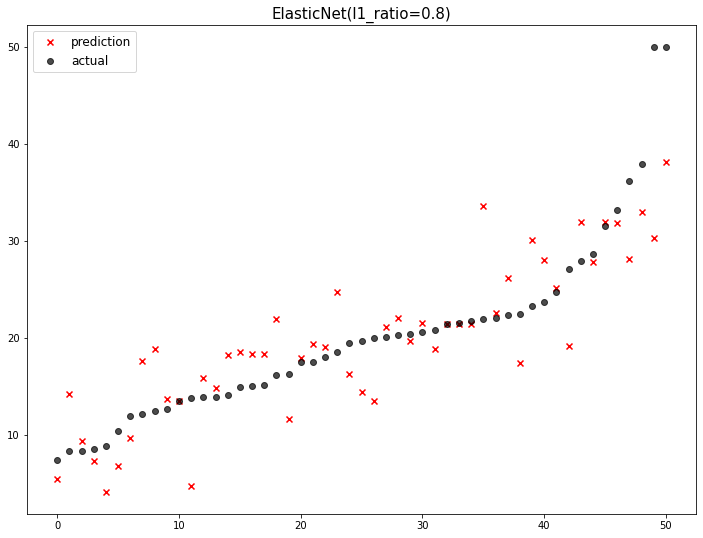

                      model        mse
0            Ridge(alpha=1)  28.476510
1  ElasticNet(l1_ratio=0.8)  27.929120
2         Lasso(alpha=0.01)  27.889024
3          LinearRegression  27.367194


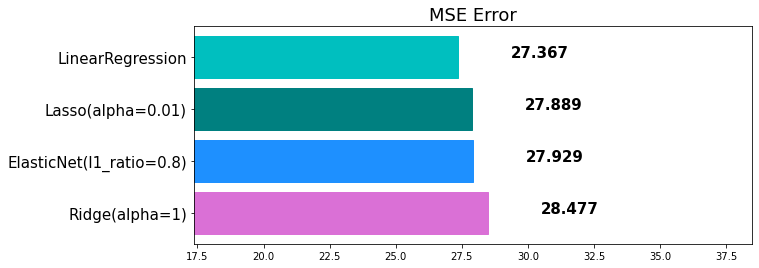

In [ ]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(X_train, y_train)
pred = elasticnet.predict(X_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test)    

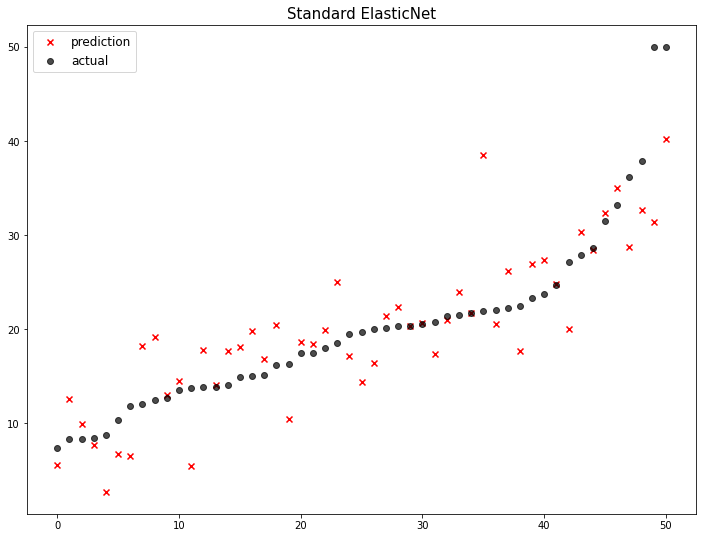

                      model        mse
0            Ridge(alpha=1)  28.476510
1  ElasticNet(l1_ratio=0.8)  27.929120
2         Lasso(alpha=0.01)  27.889024
3       Standard ElasticNet  27.849225
4          LinearRegression  27.367194


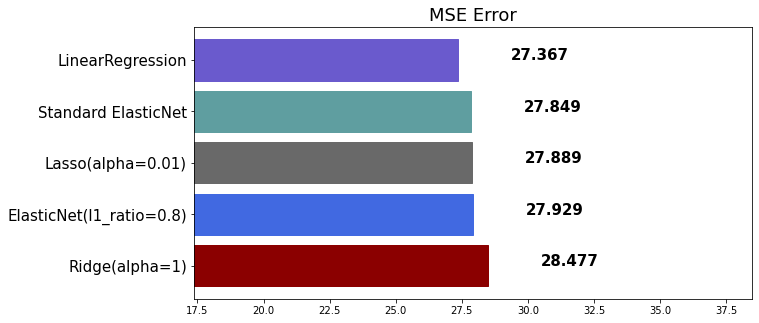

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(X_train, y_train).predict(X_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

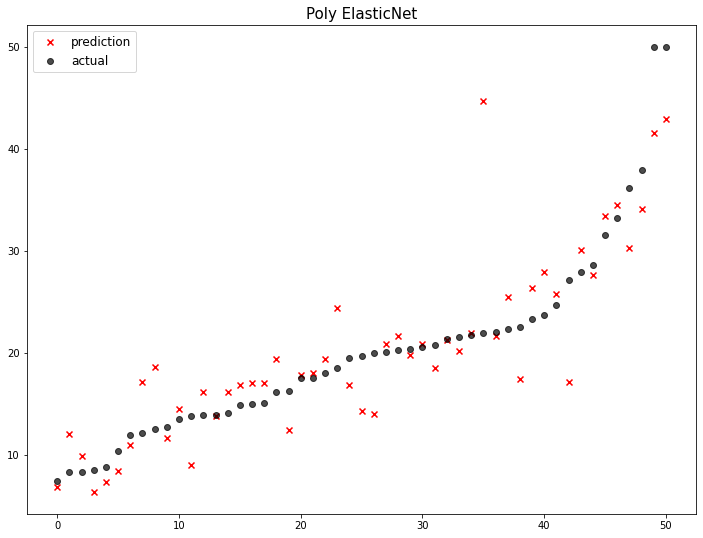

                      model        mse
0            Ridge(alpha=1)  28.476510
1  ElasticNet(l1_ratio=0.8)  27.929120
2         Lasso(alpha=0.01)  27.889024
3       Standard ElasticNet  27.849225
4          LinearRegression  27.367194
5           Poly ElasticNet  22.444606


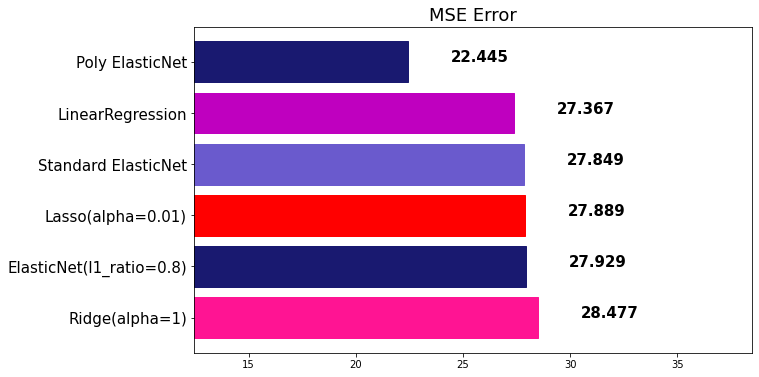

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(X_train, y_train).predict(X_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [ ]:
single_models = [
    ('linear_reg', linear_reg), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('elasticnet_pipeline', elasticnet_pipeline), 
    ('poly_pipeline', poly_pipeline)
]

In [ ]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [ ]:
voting_regressor.fit(X_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                       

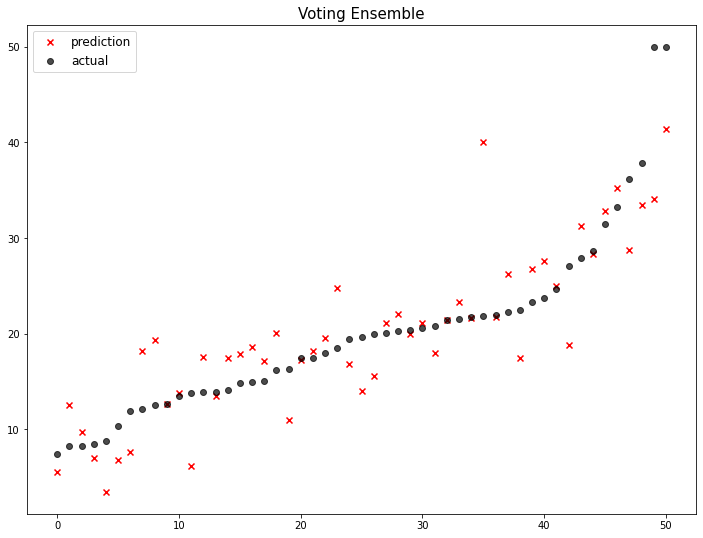

                      model        mse
0            Ridge(alpha=1)  28.476510
1  ElasticNet(l1_ratio=0.8)  27.929120
2         Lasso(alpha=0.01)  27.889024
3       Standard ElasticNet  27.849225
4          LinearRegression  27.367194
5           Voting Ensemble  25.974239
6           Poly ElasticNet  22.444606


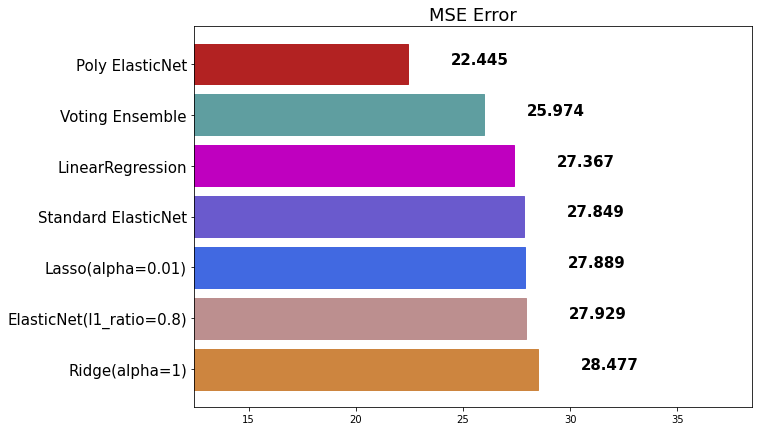

In [ ]:
voting_pred = voting_regressor.predict(X_test)
mse_eval('Voting Ensemble', voting_pred, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

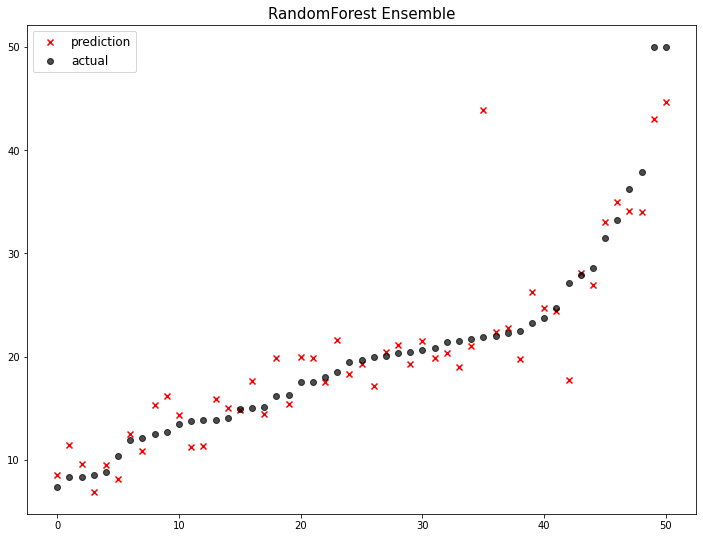

                      model        mse
0            Ridge(alpha=1)  28.476510
1  ElasticNet(l1_ratio=0.8)  27.929120
2         Lasso(alpha=0.01)  27.889024
3       Standard ElasticNet  27.849225
4          LinearRegression  27.367194
5           Voting Ensemble  25.974239
6           Poly ElasticNet  22.444606
7     RandomForest Ensemble  16.063584


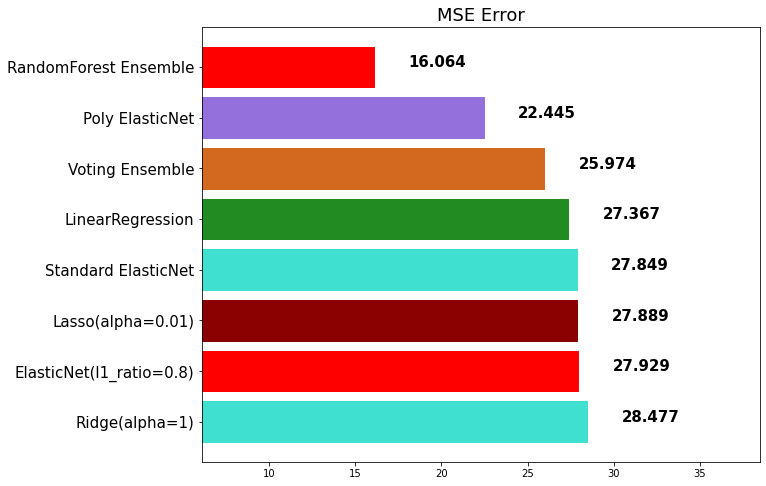

In [ ]:
rfr_pred = rfr.predict(X_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

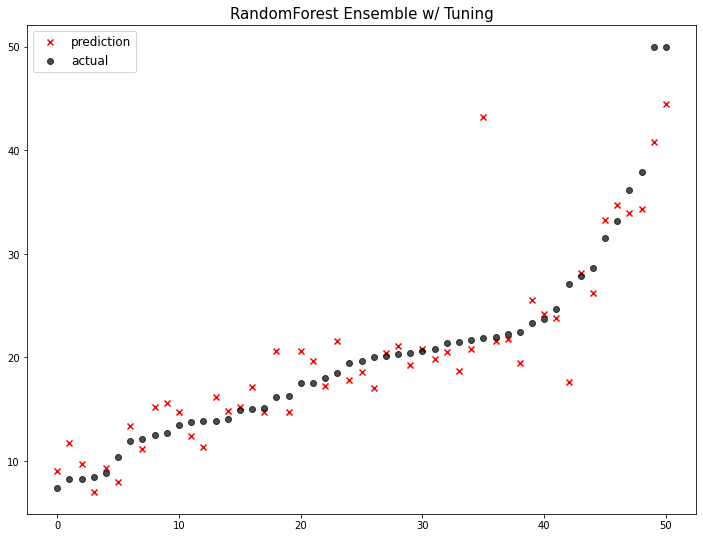

                             model        mse
0                   Ridge(alpha=1)  28.476510
1         ElasticNet(l1_ratio=0.8)  27.929120
2                Lasso(alpha=0.01)  27.889024
3              Standard ElasticNet  27.849225
4                 LinearRegression  27.367194
5                  Voting Ensemble  25.974239
6                  Poly ElasticNet  22.444606
7  RandomForest Ensemble w/ Tuning  16.478896
8            RandomForest Ensemble  16.063584


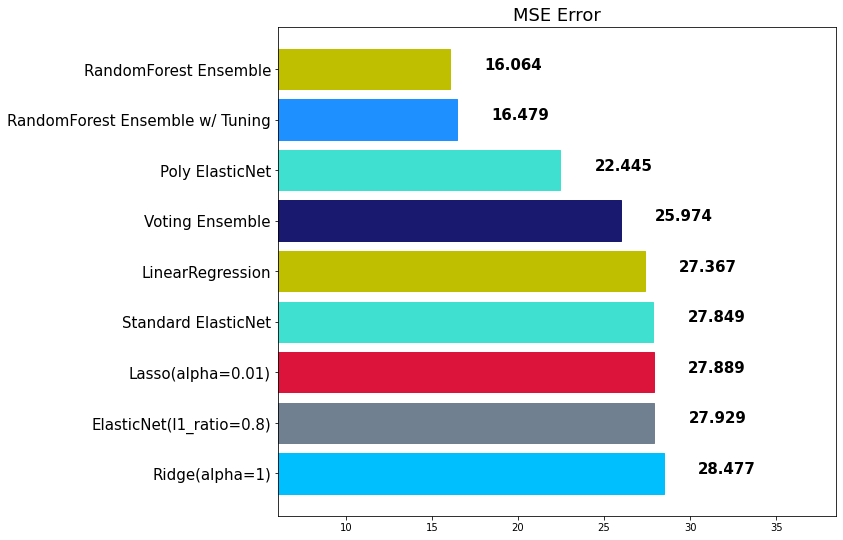

In [ ]:
rfr = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=7, max_features=0.9)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)
mse_eval('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

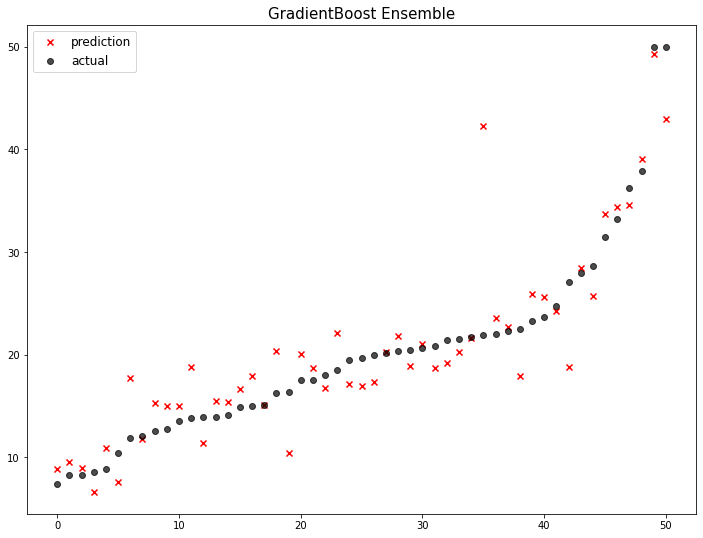

                             model        mse
0                   Ridge(alpha=1)  28.476510
1         ElasticNet(l1_ratio=0.8)  27.929120
2                Lasso(alpha=0.01)  27.889024
3              Standard ElasticNet  27.849225
4                 LinearRegression  27.367194
5                  Voting Ensemble  25.974239
6                  Poly ElasticNet  22.444606
7  RandomForest Ensemble w/ Tuning  16.478896
8            RandomForest Ensemble  16.063584
9           GradientBoost Ensemble  15.957103


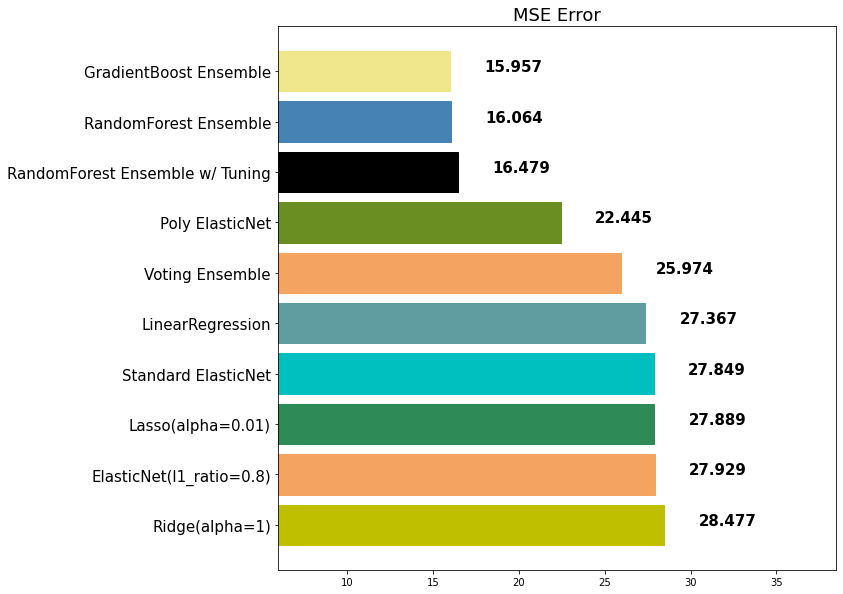

In [ ]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
mse_eval('GradientBoost Ensemble', gbr_pred, y_test)

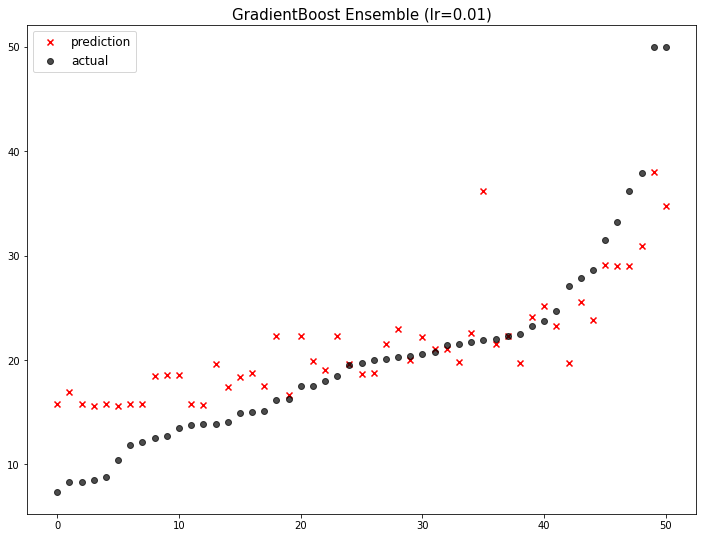

                               model        mse
0                     Ridge(alpha=1)  28.476510
1   GradientBoost Ensemble (lr=0.01)  28.059738
2           ElasticNet(l1_ratio=0.8)  27.929120
3                  Lasso(alpha=0.01)  27.889024
4                Standard ElasticNet  27.849225
5                   LinearRegression  27.367194
6                    Voting Ensemble  25.974239
7                    Poly ElasticNet  22.444606
8    RandomForest Ensemble w/ Tuning  16.478896
9              RandomForest Ensemble  16.063584
10            GradientBoost Ensemble  15.957103


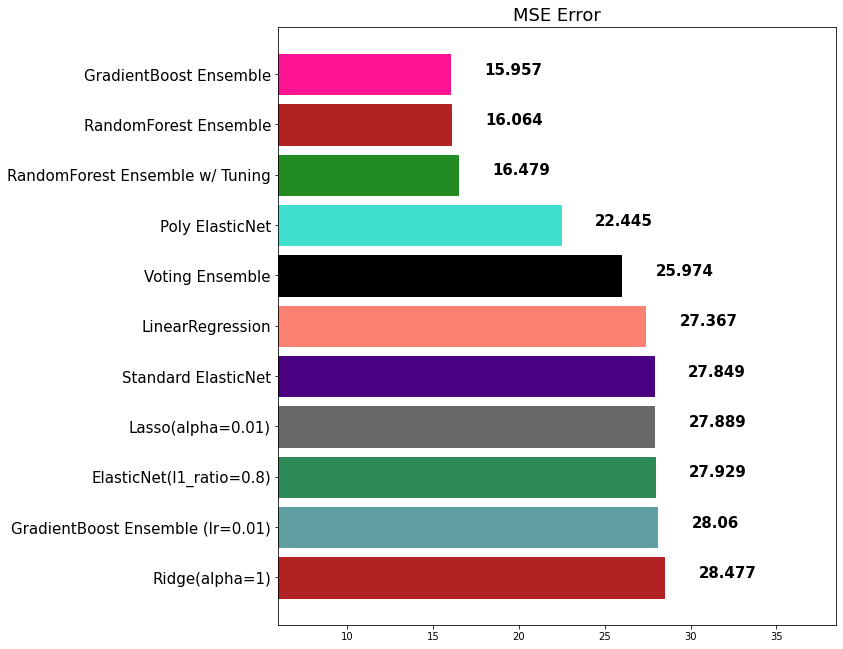

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
mse_eval('GradientBoost Ensemble (lr=0.01)', gbr_pred, y_test)

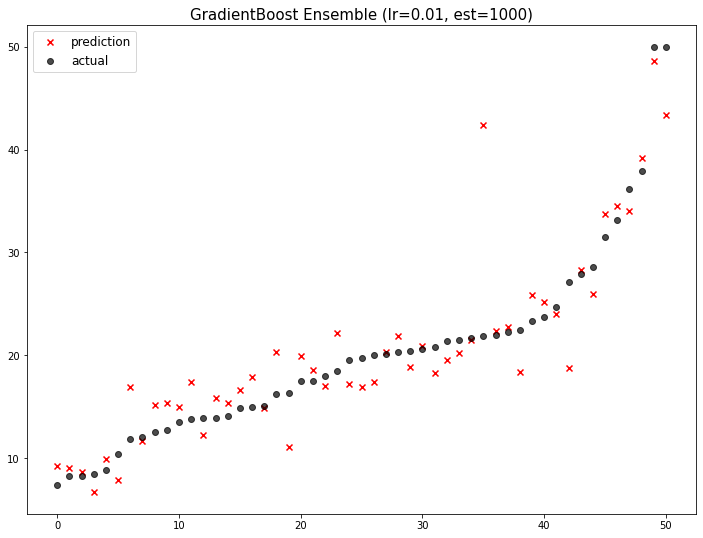

                                         model        mse
0                               Ridge(alpha=1)  28.476510
1             GradientBoost Ensemble (lr=0.01)  28.059738
2                     ElasticNet(l1_ratio=0.8)  27.929120
3                            Lasso(alpha=0.01)  27.889024
4                          Standard ElasticNet  27.849225
5                             LinearRegression  27.367194
6                              Voting Ensemble  25.974239
7                              Poly ElasticNet  22.444606
8              RandomForest Ensemble w/ Tuning  16.478896
9                        RandomForest Ensemble  16.063584
10                      GradientBoost Ensemble  15.957103
11  GradientBoost Ensemble (lr=0.01, est=1000)  15.184069


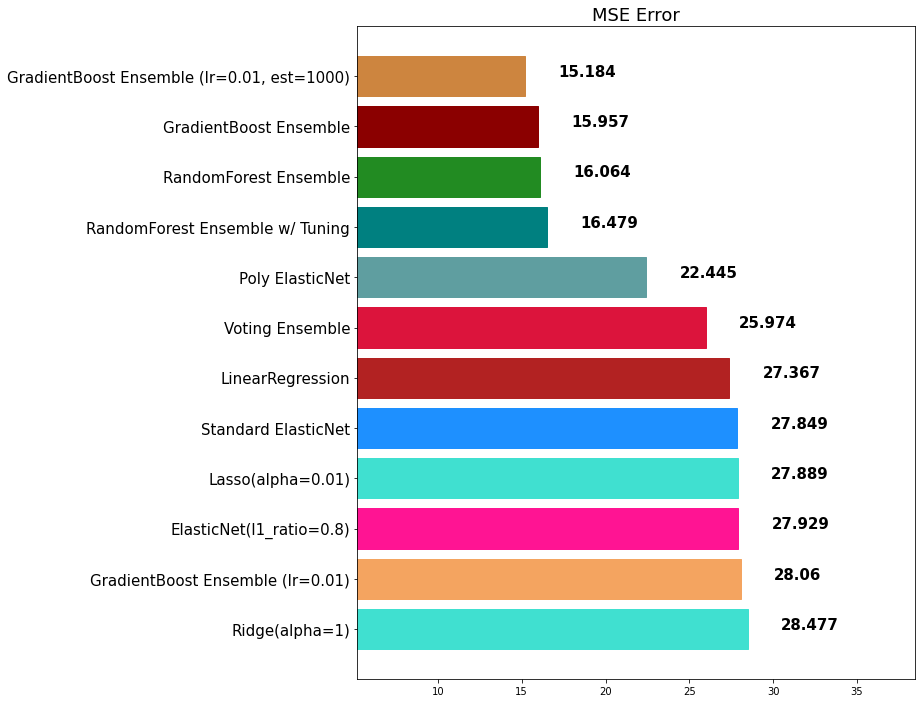

In [ ]:
gbr = GradientBoostingRegressor(random_state=42, learning_rate=0.01, n_estimators=1000)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
mse_eval('GradientBoost Ensemble (lr=0.01, est=1000)', gbr_pred, y_test)

{'learning_rate': 0.01, 'n_estimators': 10000}


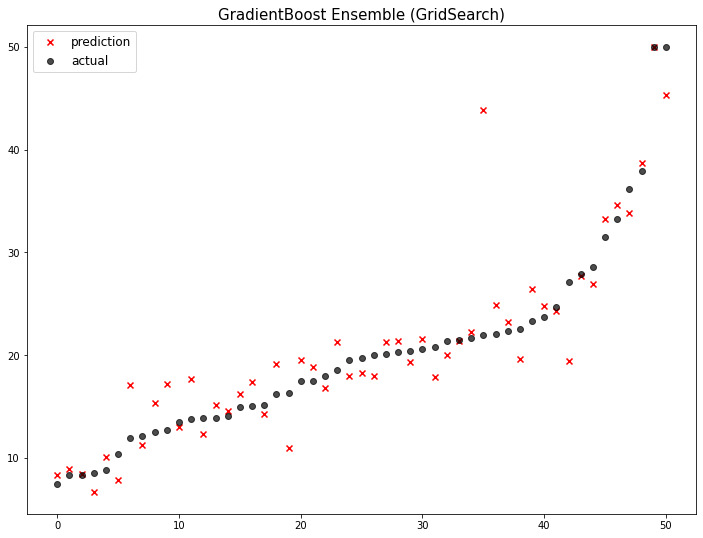

                                         model        mse
0                               Ridge(alpha=1)  28.476510
1             GradientBoost Ensemble (lr=0.01)  28.059738
2                     ElasticNet(l1_ratio=0.8)  27.929120
3                            Lasso(alpha=0.01)  27.889024
4                          Standard ElasticNet  27.849225
5                             LinearRegression  27.367194
6                              Voting Ensemble  25.974239
7                              Poly ElasticNet  22.444606
8              RandomForest Ensemble w/ Tuning  16.478896
9                        RandomForest Ensemble  16.063584
10                      GradientBoost Ensemble  15.957103
11         GradientBoost Ensemble (GridSearch)  15.307664
12  GradientBoost Ensemble (lr=0.01, est=1000)  15.184069


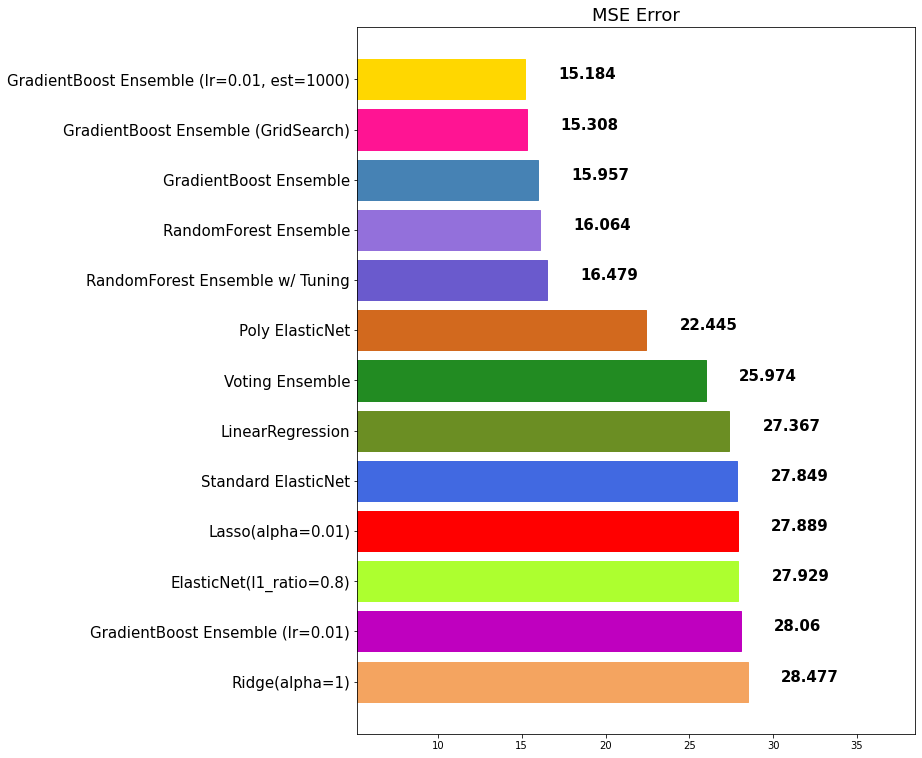

In [ ]:
params = {
    'learning_rate' : [0.001, 0.01, 0.1],
    'n_estimators' : [100, 1000, 10000]
}
gbr_grid = GridSearchCV(
    gbr, params, scoring='neg_mean_squared_error', cv=5
)
gbr_grid.fit(X_train, y_train)
gbr_best_pred = gbr_grid.best_estimator_.predict(X_test)
print(gbr_grid.best_params_)
mse_eval('GradientBoost Ensemble (GridSearch)', gbr_best_pred, y_test)

In [ ]:
boston = load_boston()
df = pd.DataFrame( boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df[df.columns[:-1]], df.PRICE, test_size=0.2, random_state=2022
)

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     92.99
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.06e-110
Time:                        08:57:51   Log-Likelihood:                -1188.8
No. Observations:                 404   AIC:                             2406.
Df Residuals:                     390   BIC:                             2462.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.6150      5.691      4.853      0.000      16.427      38.803
CRIM          -0.1094      0.034     -3.213      0.001      -0.176      -0.042
ZN             0.0418      0.015      2.768      0.006       0.012       0.071
INDUS          0.0492      0.068      0.723      0.470      -0.085       0.183
CHAS           2.7548      0.947      2.909      0.004       0.893       4.616
NOX          -13.7425      4.135     -3.324      0.001     -21.872      -5.613
RM             4.7124      0.485      9.711      0.000       3.758       5.667
AGE           -0.0120      0.015     -0.823      0.411      -0.041       0.017
DIS           -1.4352      0.227     -6.331      0.000      -1.881      -0.989
RAD            0.2987      0.073      4.114      0.000       0.156       0.441
TAX           -0.0124      0.004     -3.056      0.002      -0.020      -0.004
PTRATIO       -0.8955      0.143     -6.271      0.000      -1.176      -0.615
B              0.0103      0.003      3.524      0.000       0.005       0.016
LSTAT         -0.5211      0.059     -8.828      0.000      -0.637      -0.405
==============================================================================
Omnibus:                      186.905   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1140.918
Skew:                           1.894   Prob(JB):                    1.79e-248
Kurtosis:                      10.309   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(df[[]], X_train).fit()
model.summary()